Analiza danych ekonomicznych w celu określenia, czy istnieje związek pomiędzy napływem migrantów a konsumpcją.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
hicp = pd.read_csv('../processed_data/HICP_annual_indices_for_all_goods.csv')
unex_expences = pd.read_csv('../processed_data/inability_to_face_unexpected_expenses_(wealth).csv')
income_per_citizenship = pd.read_csv('../processed_data/mean_and_median_income_by_citizenship_ilc_di15.csv')

In [14]:
migration = pd.read_csv('../processed_data/immigration_by_citizenship.csv')

Najwięcej imigrantów przyjmują -> wniosek z pliku ../data_analysis/migration_patterns.ipynb
* NIEMCY
* HISZPANIA
* WIELKA BRYTANIA
* WŁOCHY
* HOLANDIA
* FRANCJA
+kraje wybrane do analizy 

In [15]:
countries = [
    "Germany", "Spain", "United Kingdom", 
    "Italy", "Netherlands", "France",
    "Poland", "Bulgaria", "Romania",
    "Hungary", "Sweden"
]

ścinam lata do tych samych bo jest mniej danych dot. hicp niż migracji

In [16]:
hicp_trim = hicp[hicp['geo'].isin(countries)]
migration_trim = migration[migration['geo'].isin(countries)]

common_years = set(hicp['year']).intersection(migration['year'])

migration_trim = migration_trim[migration_trim['year'].isin(common_years)]
hicp_trim = hicp_trim[hicp_trim['year'].isin(common_years)]

In [17]:
migration_trim['year'].unique() == hicp_trim['year'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

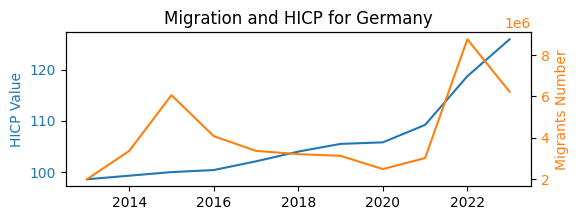

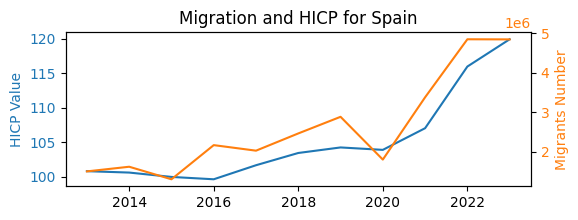

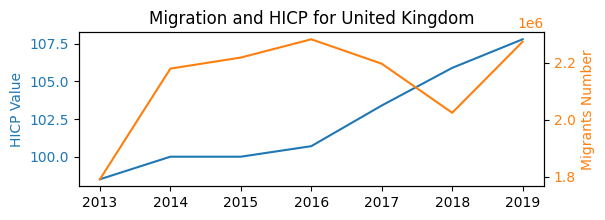

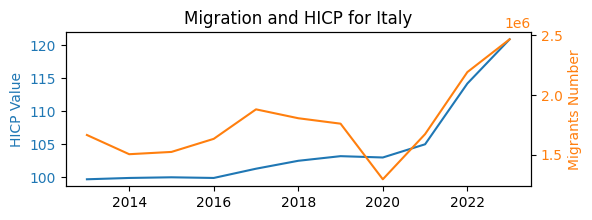

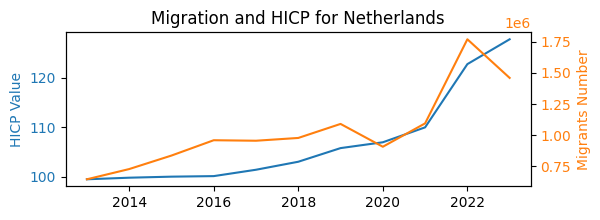

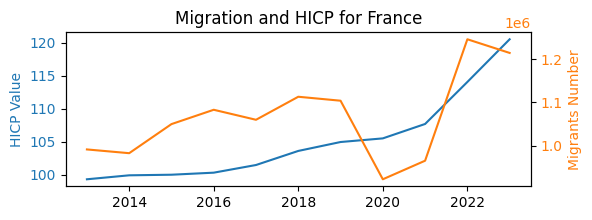

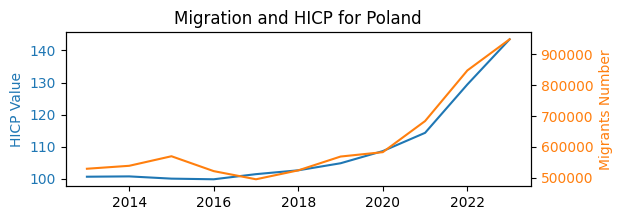

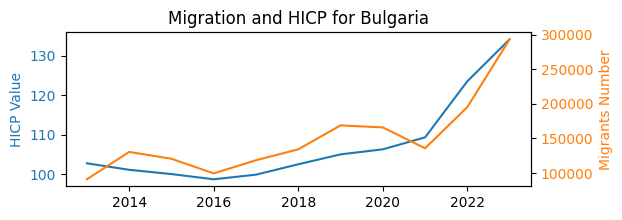

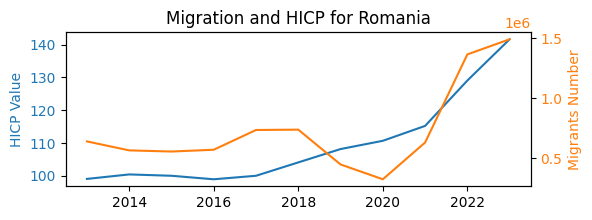

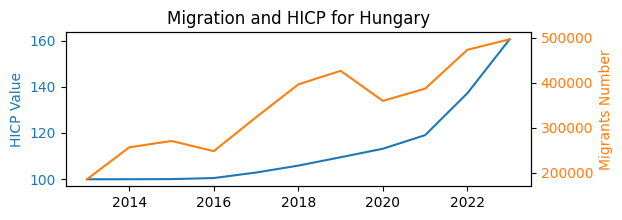

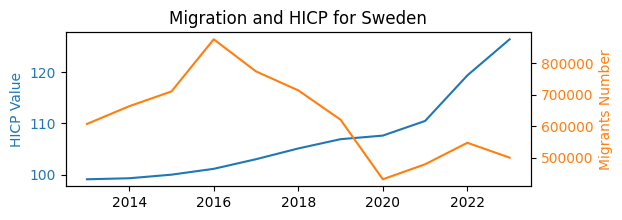

In [18]:
for country in countries:
    hicp_per_country = hicp_trim[hicp_trim['geo'] == country]
    migration_per_country = migration_trim[migration_trim['geo'] == country]

    fig, ax1 = plt.subplots(figsize=(6, 2))

    ax1.plot(hicp_per_country['year'], hicp_per_country['HICP value'], color='tab:blue', label='HICP Value')
    ax2 = ax1.twinx()
    migration_sum = migration_per_country.groupby('year')['Migrants number'].sum()
    ax2.plot(migration_sum.index, migration_sum.values, color='tab:orange', label='Migrants Number')

    ax1.set_ylabel('HICP Value', color='tab:blue')
    ax2.set_ylabel('Migrants Number', color='tab:orange')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Migration and HICP for {country}')
    plt.show()

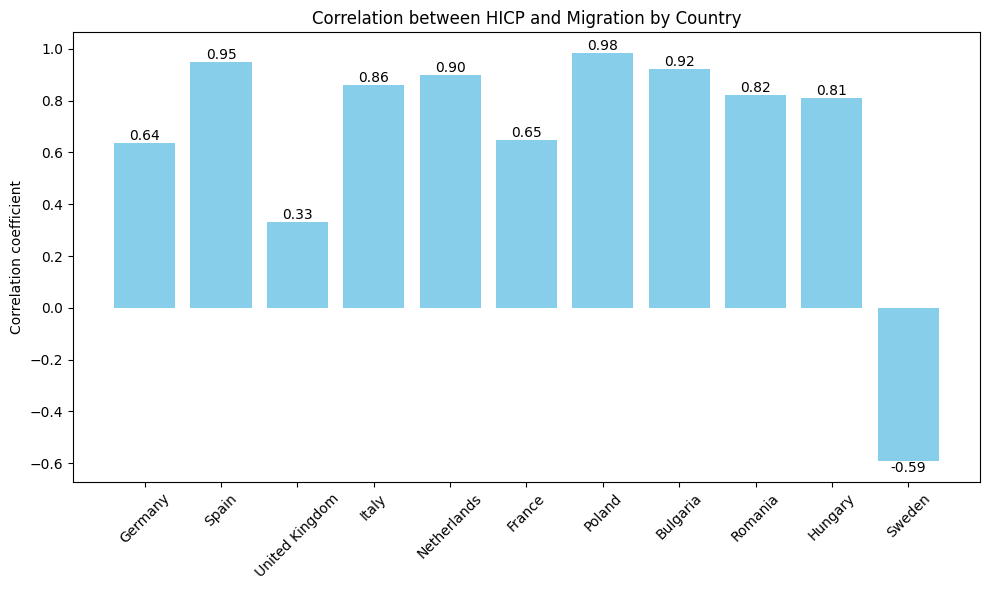

In [19]:
correlations = {}

for country in countries:
    hicp_per_country = hicp_trim[hicp_trim['geo'] == country]
    migration_per_country = migration_trim[migration_trim['geo'] == country]

    migration_sum = migration_per_country.groupby('year')['Migrants number'].sum().sort_index()
    hicp_values = hicp_per_country.set_index('year').sort_index()['HICP value']

    aligned_years = migration_sum.index.intersection(hicp_values.index)
    if len(aligned_years) > 1:
        corr = np.corrcoef(hicp_values.loc[aligned_years], migration_sum.loc[aligned_years])[0, 1]
        correlations[country] = corr
    else:
        correlations[country] = np.nan

plt.figure(figsize=(10, 6))
bars = plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.ylabel('Correlation coefficient')
plt.title('Correlation between HICP and Migration by Country')
plt.xticks(rotation=45)

# Annotate bars with correlation values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

In [26]:
e_rate_df = pd.read_csv('../processed_data/employmnet_rates_yearly.csv')
df = e_rate_df[e_rate_df['geo'] == 'Sweden'].copy()

In [33]:
income_per_citizenship.head(10)

,citizen,geo,year,Income
0,EU27 countries (from 2020) except reporting co...,Albania,2021,3454
1,EU27 countries (from 2020) except reporting co...,Austria,2015,17608
2,EU27 countries (from 2020) except reporting co...,Austria,2016,18004
3,EU27 countries (from 2020) except reporting co...,Austria,2017,20465
4,EU27 countries (from 2020) except reporting co...,Austria,2018,20823
5,EU27 countries (from 2020) except reporting co...,Austria,2019,21977
6,EU27 countries (from 2020) except reporting co...,Austria,2020,22009
7,EU27 countries (from 2020) except reporting co...,Austria,2021,22707
8,EU27 countries (from 2020) except reporting co...,Austria,2022,24061
9,EU27 countries (from 2020) except reporting co...,Austria,2023,28099


In [34]:
e_rate_df.head(10)

,citizenship,geo,employment_rate,year,Sex
0,Foreign country,Austria,59.3,1995,Females
1,Foreign country,Austria,55.4,1996,Females
2,Foreign country,Austria,57.7,1997,Females
3,Foreign country,Austria,57.6,1998,Females
4,Foreign country,Austria,55.7,1999,Females
5,Foreign country,Austria,58.6,2000,Females
6,Foreign country,Austria,57.4,2001,Females
7,Foreign country,Austria,58.5,2002,Females
8,Foreign country,Austria,59.3,2003,Females
9,Foreign country,Austria,48.6,2004,Females


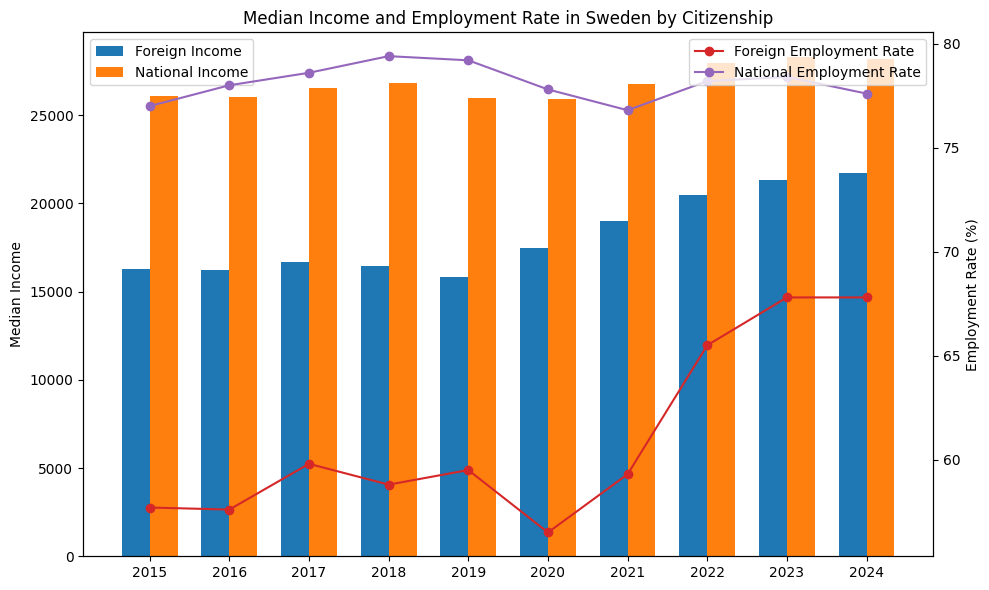

In [37]:
def plot_comparison_employment_income(country):   
    income_foreign_plot = income_per_citizenship[(income_per_citizenship['geo'] == country) & 
                                                (income_per_citizenship['citizen'] == 'Foreign country')]
    income_national_plot = income_per_citizenship[(income_per_citizenship['geo'] == country) & 
                                                (income_per_citizenship['citizen'] == 'Reporting country')]

    df_foreign = e_rate_df[(e_rate_df['geo'] == country) & 
                        (e_rate_df['citizenship'] == 'Foreign country')].copy()
    df_reporting = e_rate_df[(e_rate_df['geo'] == country) & 
                            (e_rate_df['citizenship'] == 'Reporting country')].copy()

    fig, ax1 = plt.subplots(figsize=(10, 6))


    bar_width = 0.35
    years_common = income_foreign_plot['year'].values
    x = np.arange(len(years_common))

    ax1.bar(x - bar_width/2, income_foreign_plot['Income'], width=bar_width, label='Foreign Income', color='tab:blue')
    ax1.bar(x + bar_width/2, income_national_plot['Income'], width=bar_width, label='National Income', color='tab:orange')
    ax1.set_ylabel('Median Income')
    ax1.set_xticks(x)
    ax1.set_xticklabels(years_common)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()

    ax2.plot(x, df_foreign['employment_rate'].iloc[-len(years_common):].values, color='tab:red', marker='o', label='Foreign Employment Rate')
    ax2.plot(x, df_reporting['employment_rate'].iloc[-len(years_common):].values, color='tab:purple', marker='o', label='National Employment Rate')
    ax2.set_ylabel('Employment Rate (%)')
    ax2.legend(loc='upper right')

    plt.title(f'Median Income and Employment Rate in {country} by Citizenship')
    plt.tight_layout()
    plt.show()

plot_comparison_employment_income('Sweden')

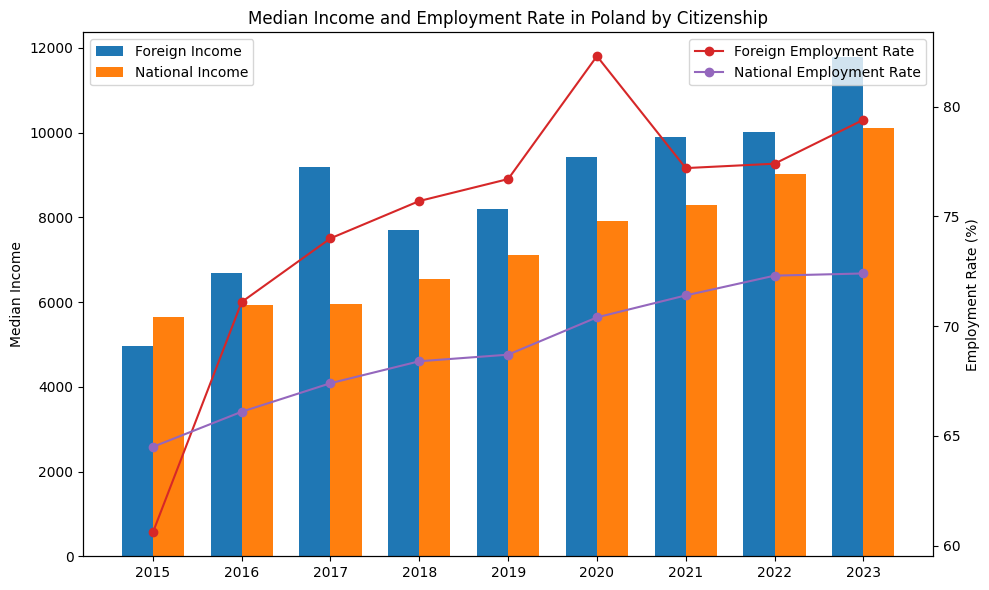

In [38]:
plot_comparison_employment_income('Poland')

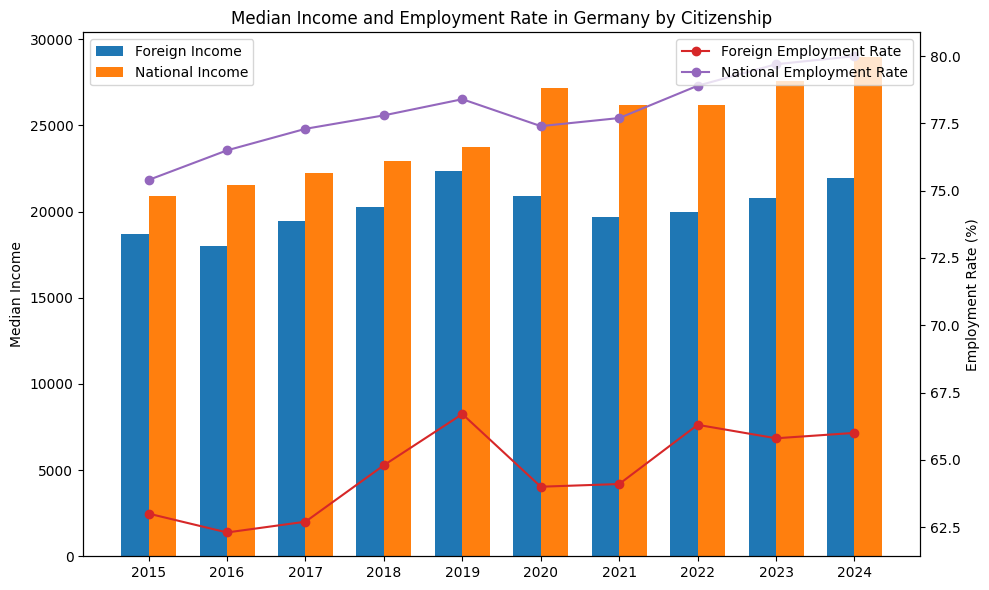

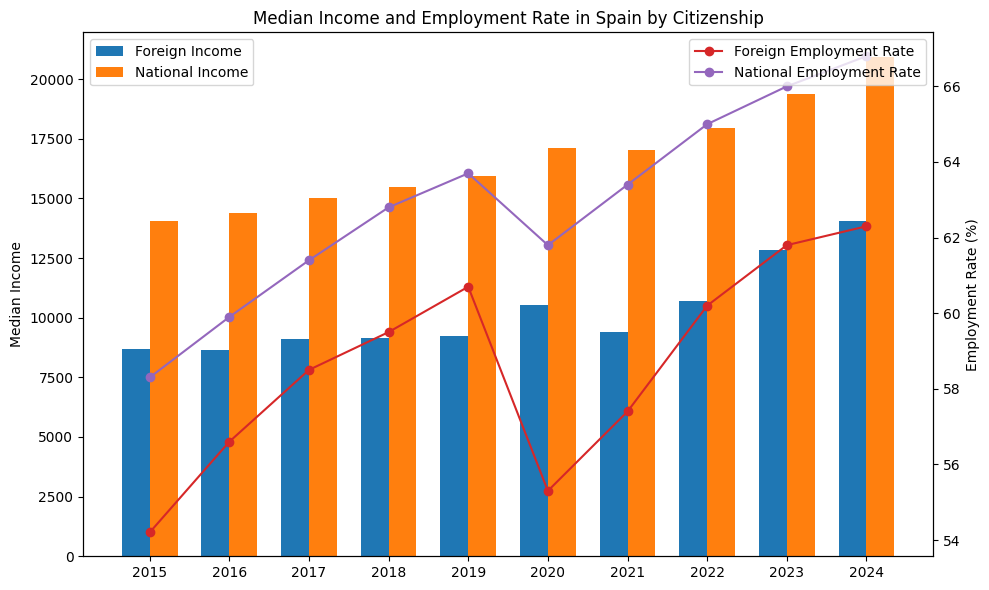

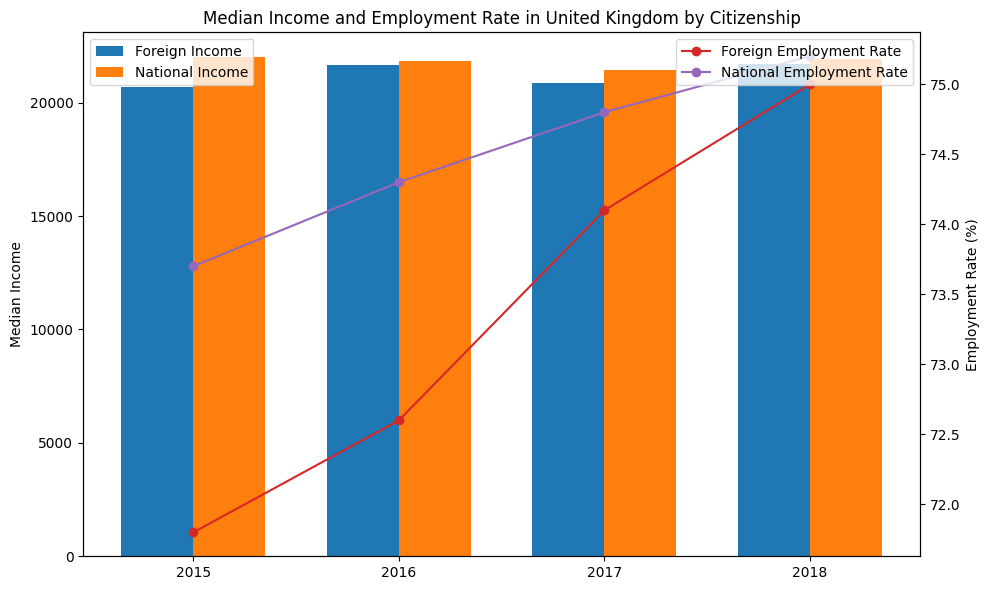

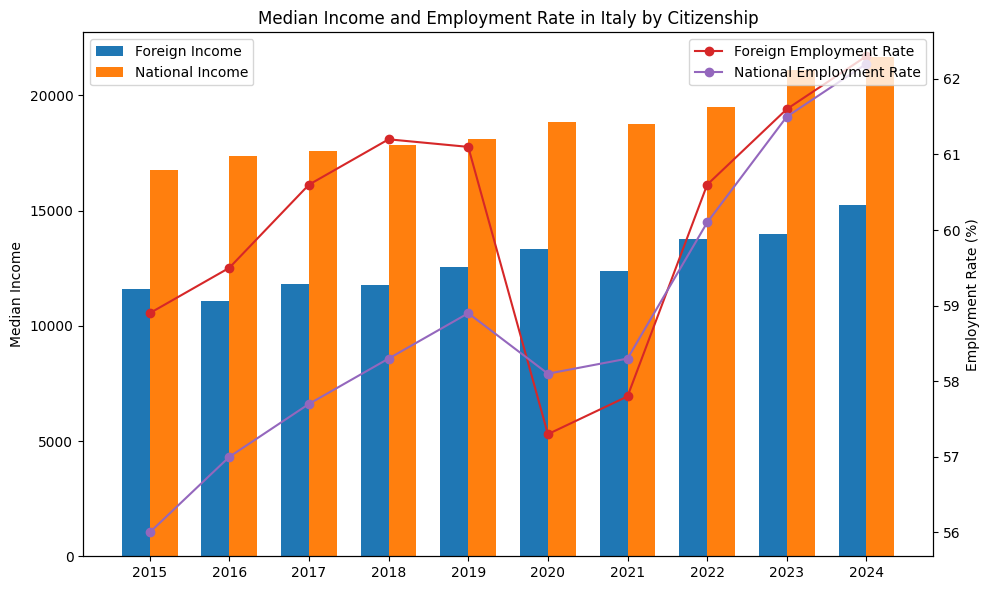

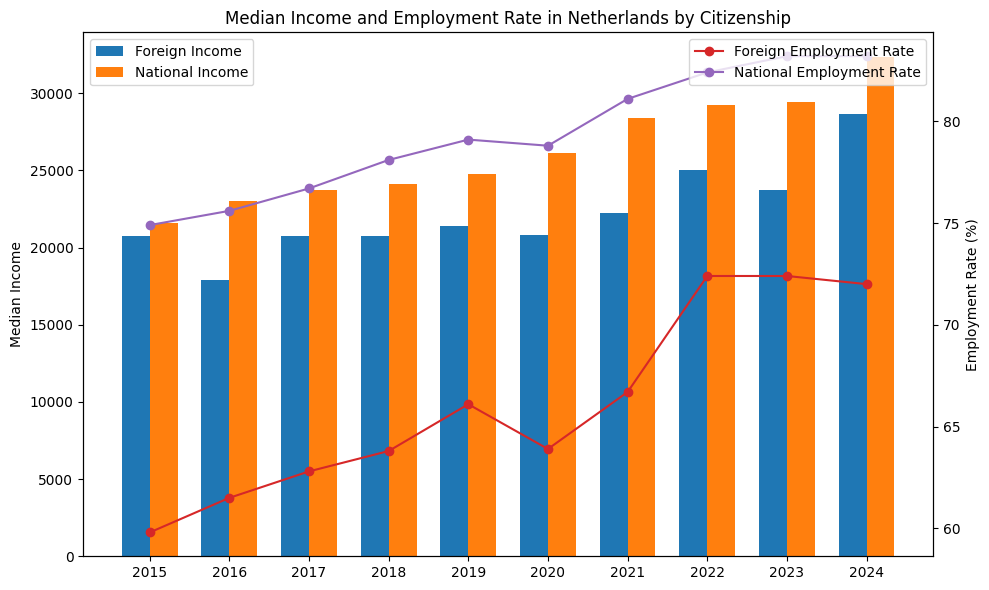

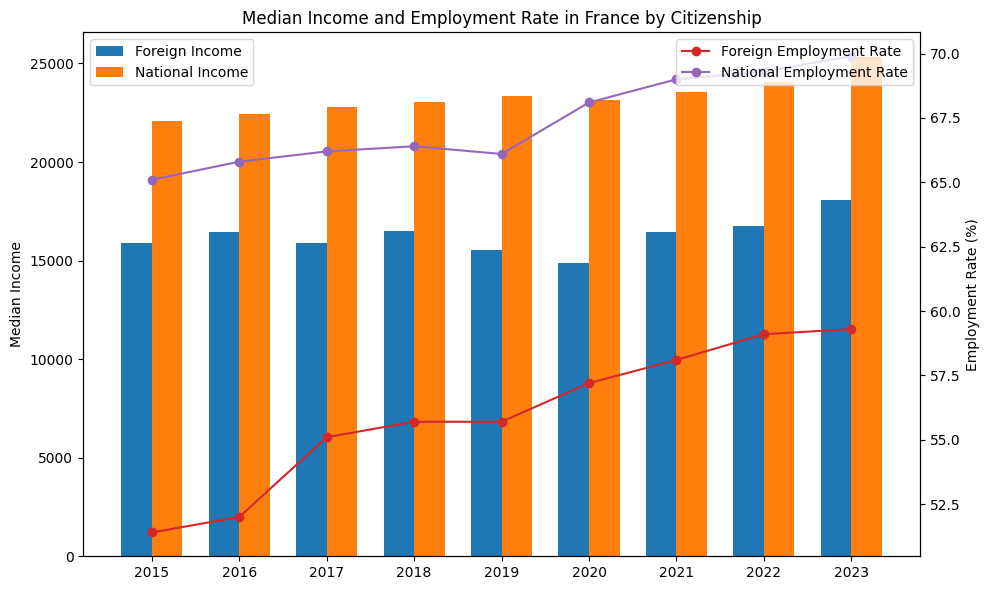

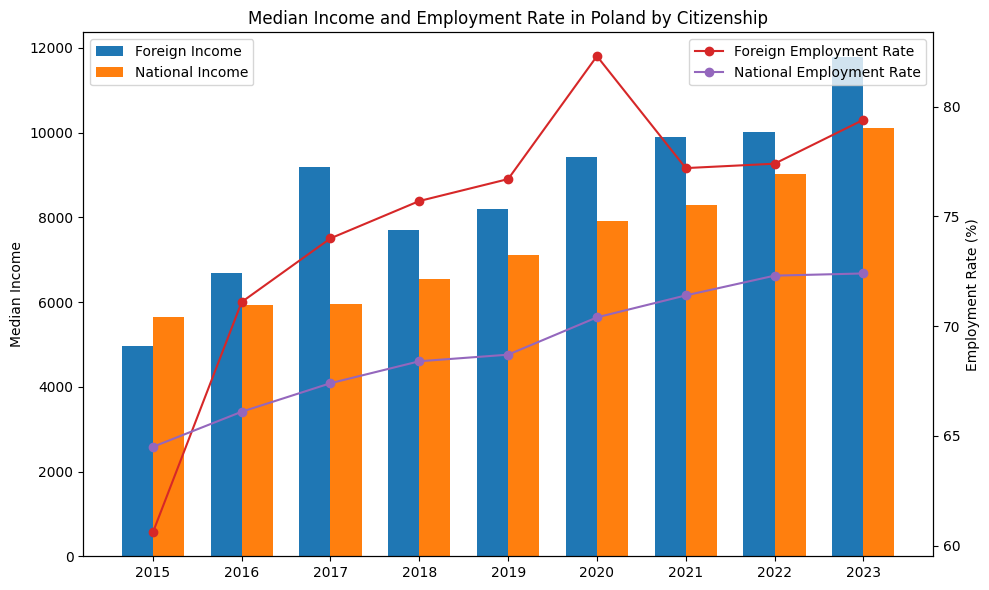

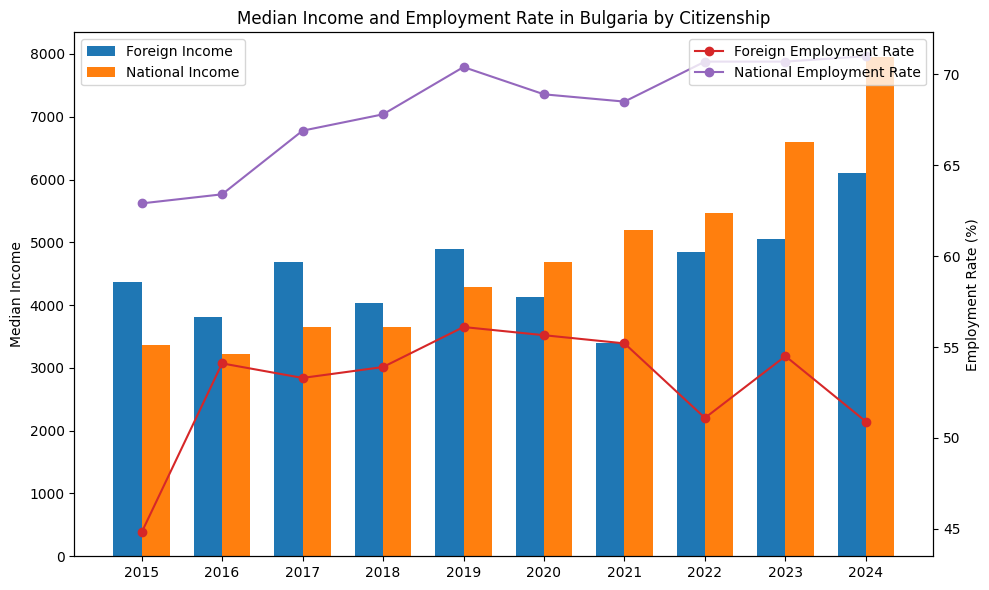

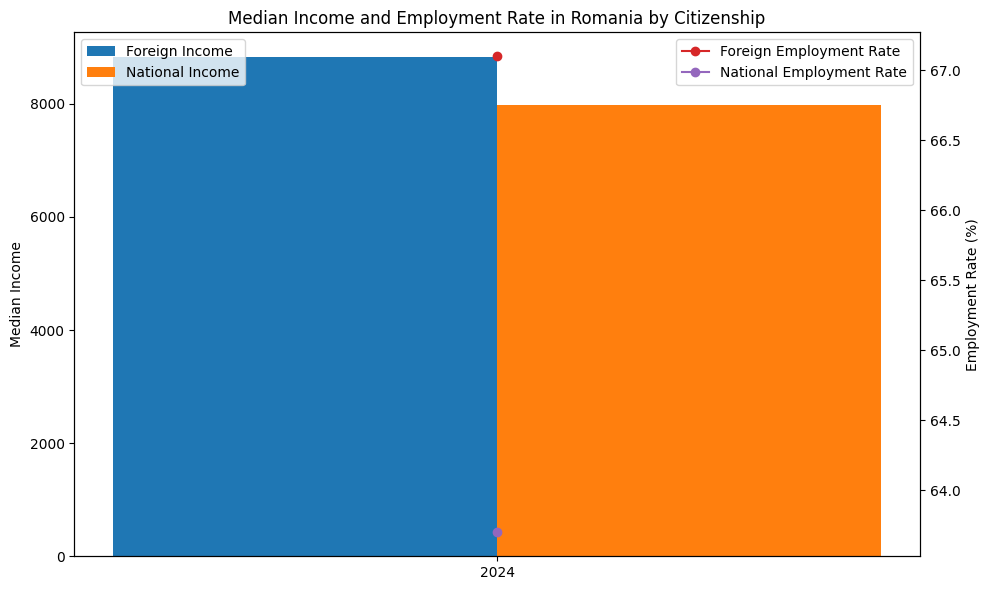

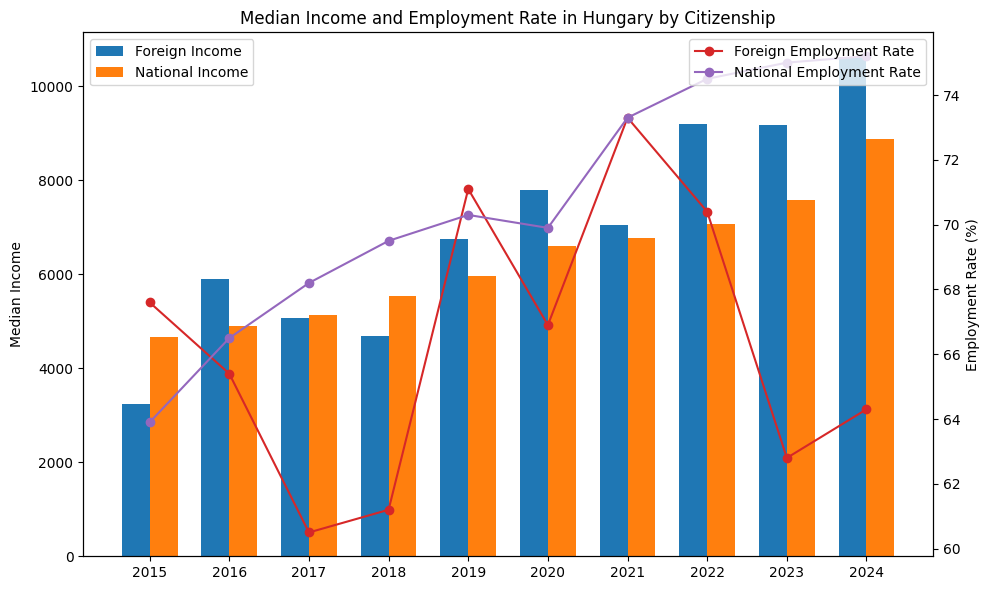

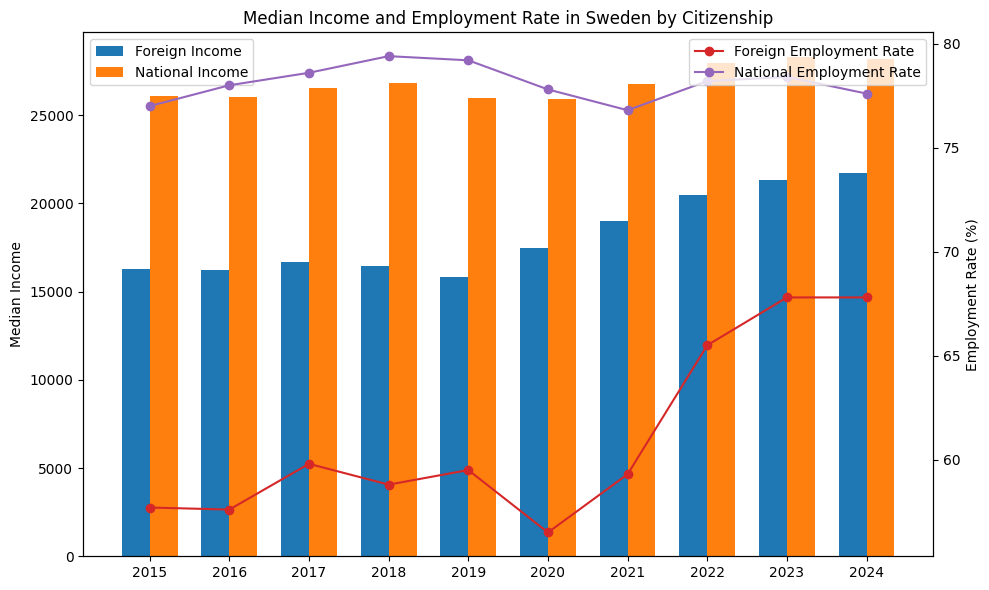

In [39]:
for country in countries:
    plot_comparison_employment_income(country)

In [ ]:
trust = pd.read_csv('../processed_data/level_of_trust.csv')
print(trust.head())
print(trust['domain'].unique())


         domain    sex          geo  year  Level of trust in %
0  Legal system  Total      Austria  2013                 57.0
1  Legal system  Total      Belgium  2013                 47.0
2  Legal system  Total     Bulgaria  2013                 28.0
3  Legal system  Total  Switzerland  2013                 68.0
4  Legal system  Total       Cyprus  2013                 35.0
['Legal system' 'Police' 'Political system']
[2013]


dupa, trust do wyjebania bo tylko dane z 2013 : )

In [ ]:
fertility = pd.read_csv('../processed_data/total_fertility_rate.csv')
fertility.head()

,geo,year,Total fertility rate
0,Albania,2012,1.71
1,Albania,2013,1.73
2,Albania,2014,1.73
3,Albania,2015,1.59
4,Albania,2016,1.54


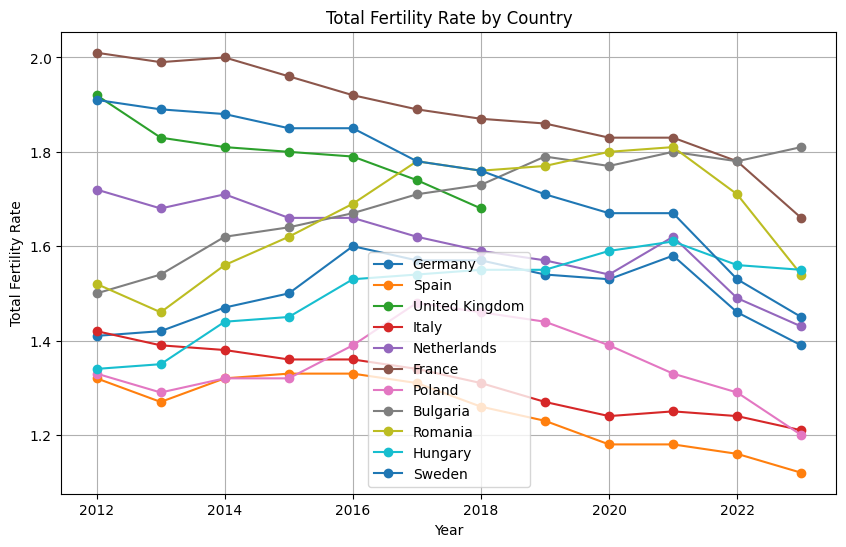

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
for country in countries:
    fertility_per_country = fertility[fertility['geo'] == country]
    ax.plot(fertility_per_country['year'], fertility_per_country['Total fertility rate'], marker='o', label=country)

ax.set_title('Total Fertility Rate by Country')
ax.set_xlabel('Year')
ax.set_ylabel('Total Fertility Rate')
ax.grid()
ax.legend()
plt.show()

korelacja napływu migrantów i fertility rate - pokazane wykresy w czasie+ korelacja przeliczona dla lagu 1, 2 i 3 letniego

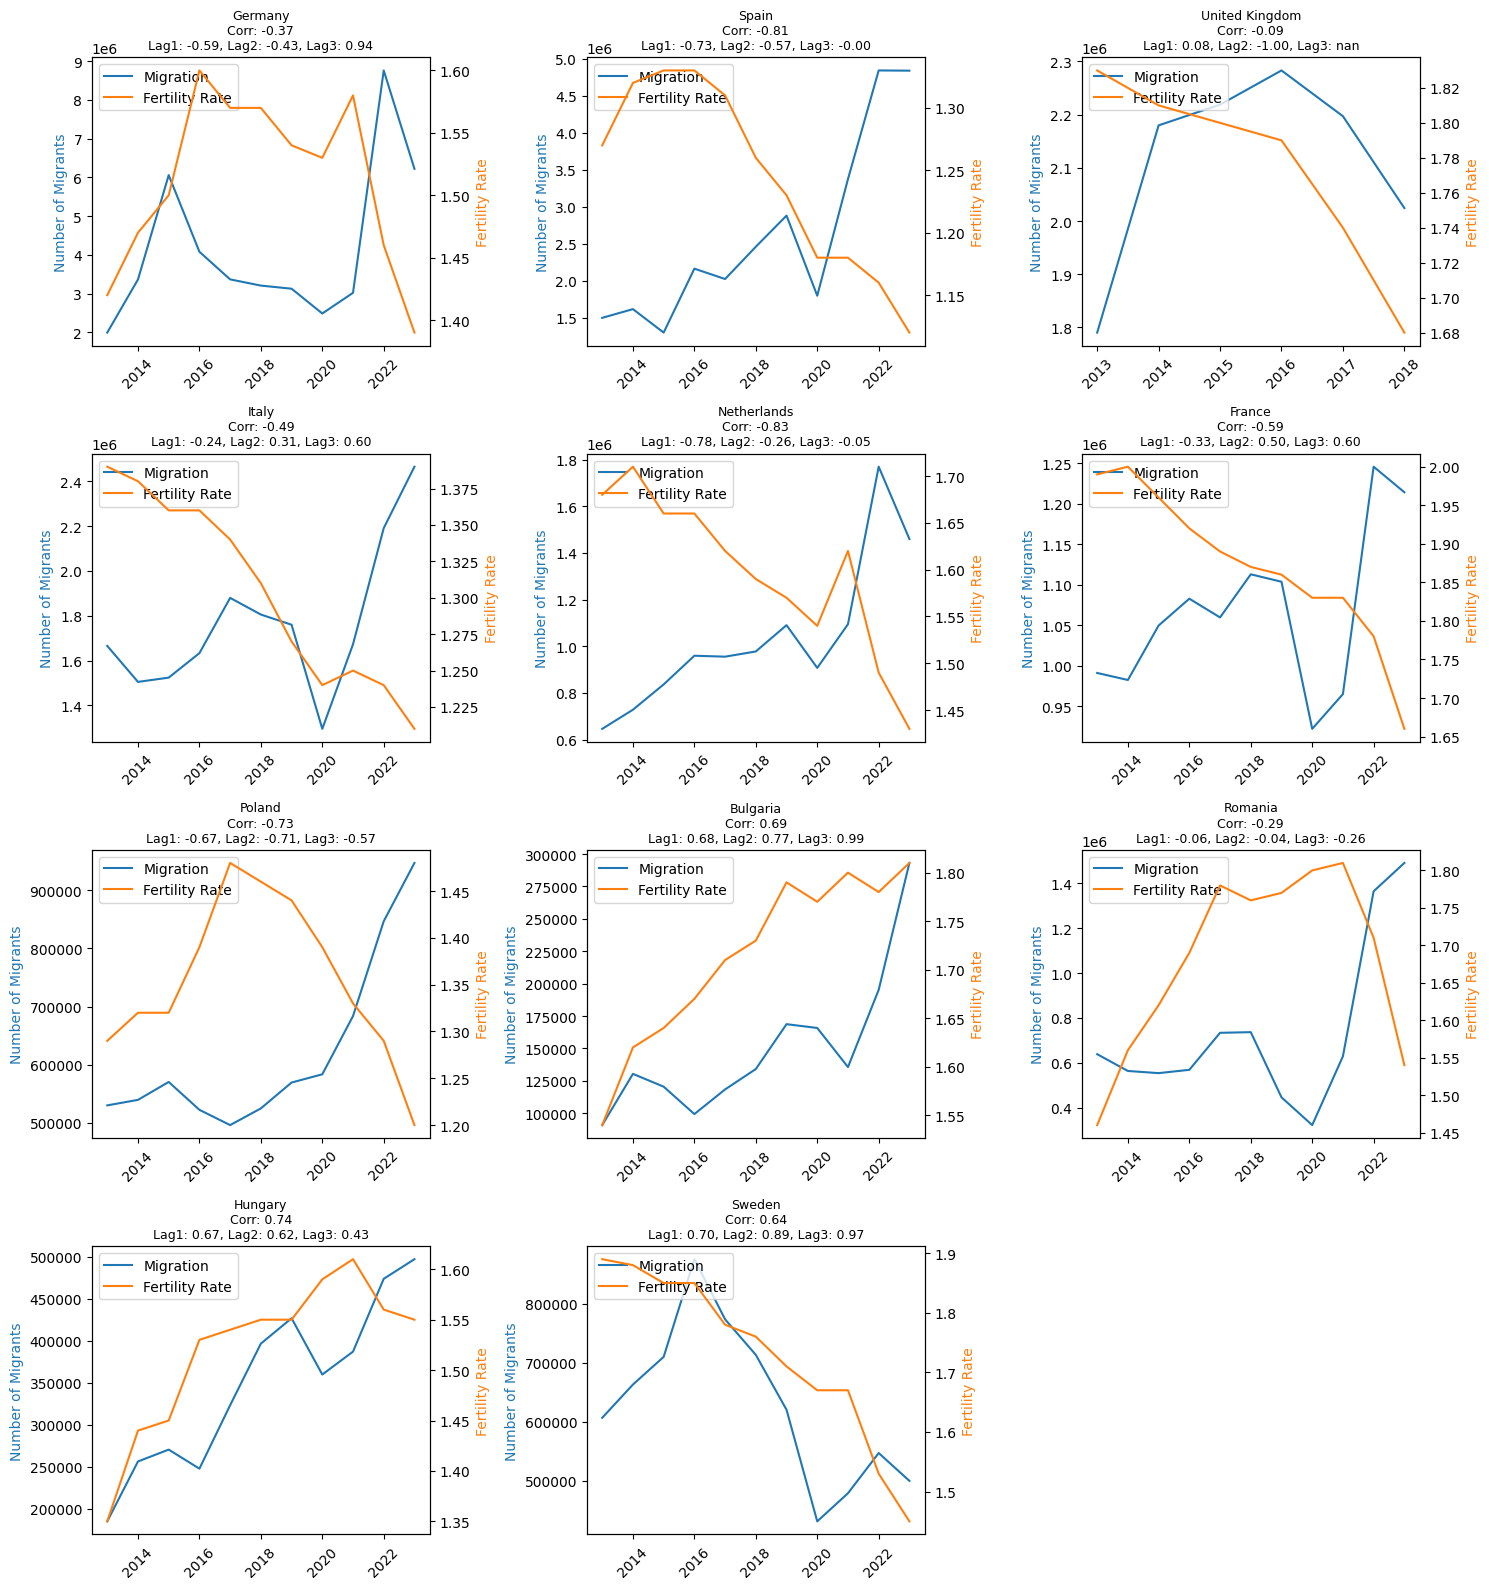

In [ ]:

def prepare_data(country, migration_trim, fertility):
    migration_per_country = migration_trim[migration_trim['geo'] == country]
    fertility_per_country = fertility[fertility['geo'] == country]
    
    migration_yearly = migration_per_country.groupby('year')['Migrants number'].sum().reset_index()
    
    merged_data = pd.merge(migration_yearly, fertility_per_country[['year', 'Total fertility rate']], 
                          on='year', how='inner')
    return merged_data

n_countries = len(countries)
n_cols = 3
n_rows = (n_countries + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, country in enumerate(countries):
    data = prepare_data(country, migration_trim, fertility)
    
    ax1 = axes[idx]
    ax2 = ax1.twinx()
    
    color1 = 'tab:blue'
    ln1 = ax1.plot(data['year'], data['Migrants number'], 
                   color=color1, label='Migration')
    ax1.set_ylabel('Number of Migrants', color=color1)
    
    color2 = 'tab:orange'
    ln2 = ax2.plot(data['year'], data['Total fertility rate'], 
                   color=color2, label='Fertility Rate')
    ax2.set_ylabel('Fertility Rate', color=color2)
    
    corr = data['Migrants number'].corr(data['Total fertility rate'])
        
    lag_correlations = []
    for lag in range(1, 4):  # for 1, 2, and 3 year lags
        if len(data) > lag:
            lag_corr = data['Migrants number'].iloc[:-lag].corr(
                data['Total fertility rate'].iloc[lag:])
            lag_correlations.append(f"Lag{lag}: {lag_corr:.2f}")
        else:
            lag_correlations.append(f"Lag{lag}: nan")
    
    # Update title with all correlations
    title = f"{country}\nCorr: {corr:.2f}\n{', '.join(lag_correlations)}"
    ax1.set_title(title, fontsize=9)
        
    
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    ax1.tick_params(axis='x', rotation=45)

for idx in range(len(countries), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()